In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("D:\\FCDS\\Stochastic\\weatherHistory.csv\\weatherHistory.csv")
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


#### — Data Cleaning

In [3]:
df = df.dropna(subset=["Summary"])

print("Unique weather descriptions:")
df["Summary"].unique()[:30]

Unique weather descriptions:


array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [4]:
# will make only 3 states (Sunny – Cloudy – Rainy)

def map_weather(summary):
    summary = summary.lower()
    
    if "clear" in summary or "sunny" in summary:
        return "Sunny"
    elif "cloudy" in summary or "overcast" in summary:
        return "Cloudy"
    elif "rain" in summary or "drizzle" in summary or "storm" in summary:
        return "Rainy"
    else:
        return "Cloudy"   # default state

df["State"] = df["Summary"].apply(map_weather)

df[["Summary", "State"]].head(20)


,Summary,State
0,Partly Cloudy,Cloudy
1,Partly Cloudy,Cloudy
2,Mostly Cloudy,Cloudy
3,Partly Cloudy,Cloudy
4,Mostly Cloudy,Cloudy
5,Partly Cloudy,Cloudy
6,Partly Cloudy,Cloudy
7,Partly Cloudy,Cloudy
8,Partly Cloudy,Cloudy
9,Partly Cloudy,Cloudy


In [5]:
weather_sequence = df["State"].tolist()
print("First 20 states in the sequence:")
weather_sequence[:20]


First 20 states in the sequence:


['Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy']

In [6]:
## Build Transition Count Matrix
states = ["Sunny", "Cloudy", "Rainy"]
# Initialize counts
transition_counts = {s: {s2: 0 for s2 in states} for s in states}

# Count transitions
for i in range(len(weather_sequence) - 1):
    curr_state = weather_sequence[i]
    next_state = weather_sequence[i+1]
    transition_counts[curr_state][next_state] += 1

transition_matrix = pd.DataFrame(transition_counts).T
transition_matrix


,Sunny,Cloudy,Rainy
Sunny,7576,3314,0
Cloudy,3314,82118,18
Rainy,0,18,94


In [7]:
transition_prob = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)
transition_prob


,Sunny,Cloudy,Rainy
Sunny,0.695684,0.304316,0.000000
Cloudy,0.038783,0.961006,0.000211
Rainy,0.000000,0.160714,0.839286


In [8]:
print("Transition Probability Matrix:")
transition_prob.style.background_gradient(cmap="Blues")


Transition Probability Matrix:


,Sunny,Cloudy,Rainy
Sunny,0.695684,0.304316,0.000000
Cloudy,0.038783,0.961006,0.000211
Rainy,0.000000,0.160714,0.839286


In [9]:
intial_count = df['State'].value_counts()
pi = intial_count / intial_count.sum()
pi

State
Cloudy    0.885934
Sunny     0.112905
Rainy     0.001161
Name: count, dtype: float64

In [10]:
A = transition_prob
A

,Sunny,Cloudy,Rainy
Sunny,0.695684,0.304316,0.000000
Cloudy,0.038783,0.961006,0.000211
Rainy,0.000000,0.160714,0.839286


In [11]:
df['Precip Type'] = df['Precip Type'].fillna("none")

In [12]:
obs = ["rain","snow","none"]
states = ["Sunny", "Cloudy", "Rainy"]
emission_counts = {s:{o: 0 for o in obs}for s in states}
emission_counts

{'Sunny': {'rain': 0, 'snow': 0, 'none': 0},
 'Cloudy': {'rain': 0, 'snow': 0, 'none': 0},
 'Rainy': {'rain': 0, 'snow': 0, 'none': 0}}

In [13]:
df['State'].count()

96453

In [14]:
for i in range(len(df)):
    state_value = df.iloc[i]['State']
    obs_value = df.iloc[i]['Precip Type']
    if obs_value not in obs:
        obs_value = "none"
    emission_counts[state_value][obs_value]+=1

In [15]:
B_counts = pd.DataFrame(emission_counts).T
B_counts

,rain,snow,none
Sunny,9371,1392,127
Cloudy,75741,9320,390
Rainy,112,0,0


In [16]:
B = B_counts.div(B_counts.sum(axis=1),axis=0)
B

,rain,snow,none
Sunny,0.860514,0.127824,0.011662
Cloudy,0.886368,0.109068,0.004564
Rainy,1.000000,0.000000,0.000000


In [17]:
pi_vec = pi
pi_vec

State
Cloudy    0.885934
Sunny     0.112905
Rainy     0.001161
Name: count, dtype: float64

In [18]:
A_mat = A.to_numpy()
A_mat

array([[6.95684114e-01, 3.04315886e-01, 0.00000000e+00],
       [3.87829140e-02, 9.61006437e-01, 2.10649503e-04],
       [0.00000000e+00, 1.60714286e-01, 8.39285714e-01]])

In [19]:
B_mat = B.reindex(columns=obs).to_numpy()
B_mat

array([[0.86051423, 0.12782369, 0.01166208],
       [0.88636763, 0.10906835, 0.00456402],
       [1.        , 0.        , 0.        ]])

In [20]:
print("π vector:", pi_vec)
print("A matrix shape:", A_mat.shape)
print("B matrix shape:", B_mat.shape)

π vector: State
Cloudy    0.885934
Sunny     0.112905
Rainy     0.001161
Name: count, dtype: float64
A matrix shape: (3, 3)
B matrix shape: (3, 3)


In [21]:
# Count how many times each state appears
state_counts = df['State'].value_counts()

# Normalize to get the π vector
pi_vector = state_counts / state_counts.sum()

print("Initial State Distribution (π):")
pi_vector


Initial State Distribution (π):


State
Cloudy    0.885934
Sunny     0.112905
Rainy     0.001161
Name: count, dtype: float64

In [22]:
# Convert π and A to numpy arrays
pi_vec_np = pi_vector.to_numpy()
A_np = A.to_numpy()

# One-step prediction
next_day_pred = pi_vec_np @ A_np

print("Prediction for the next day (π × A):")
next_day_pred


Prediction for the next day (π × A):


array([0.62070904, 0.37829261, 0.00099835])

In [23]:
def predict_n_days(pi_vector, A_matrix, n):
    An = np.linalg.matrix_power(A_matrix, n)
    return pi_vector @ An

print("Prediction after 3 days:")
print(predict_n_days(pi_vec_np, A_np, 3))

print("Prediction after 7 days:")
print(predict_n_days(pi_vec_np, A_np, 7))


Prediction after 3 days:
[0.3320463  0.66706718 0.00088652]
Prediction after 7 days:
[0.15373542 0.84531796 0.00094662]


In [24]:
# Calculate eigenvalues & eigenvectors of A^T
eigenvalues, eigenvectors = np.linalg.eig(A_np.T)

# Find eigenvector corresponding to eigenvalue ≈ 1
steady_state_index = np.argmin(np.abs(eigenvalues - 1))
steady_state = eigenvectors[:, steady_state_index].real

# Normalize so the probabilities sum to 1
steady_state = steady_state / steady_state.sum()

print("Steady-state distribution:")
steady_state


Steady-state distribution:


array([0.1129059, 0.8859329, 0.0011612])

In [25]:
long_term = predict_n_days(pi_vec_np, A_np, 100)

print("Prediction after 100 days:")
print(long_term)

print("Steady-state distribution (should be very similar):")
print(steady_state)


Prediction after 100 days:
[0.1129059 0.8859329 0.0011612]
Steady-state distribution (should be very similar):
[0.1129059 0.8859329 0.0011612]


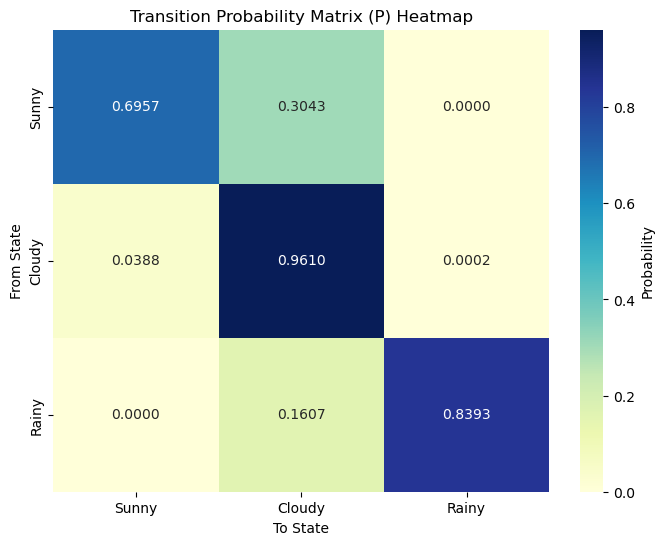

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare variables for plotting consistency
P_np = A.to_numpy() # Convert P matrix to NumPy for simulation
P_df = A # Use A as the DataFrame for plotting

# Create a Pandas Series for the steady-state vector for easy plotting by state name
steady_state_series = pd.Series(steady_state, index=states)

# ----------------------------------------------------------------------
# 1. Generate Transition Matrix Heatmap - GRAPH 1
# ----------------------------------------------------------------------
plt.figure(figsize=(8, 6))
# Use seaborn to visually represent the transition probabilities (P)
sns.heatmap(P_df, annot=True, cmap="YlGnBu", fmt=".4f", cbar_kws={'label': 'Probability'})
plt.title('Transition Probability Matrix (P) Heatmap')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show() 
# plt.savefig('Transition_Matrix_Heatmap.png') 
plt.close()

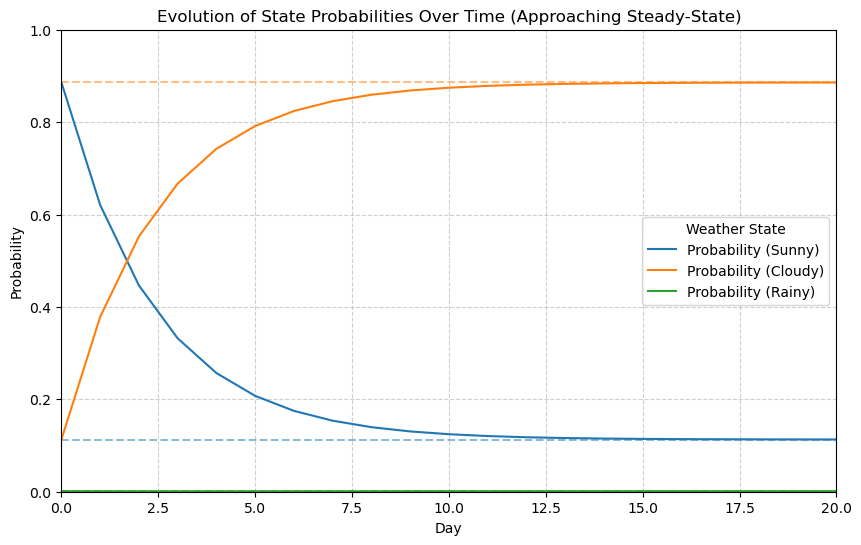

Graph generation code executed successfully.


In [27]:
# ----------------------------------------------------------------------
# 2. Generate State Probability Evolution Plot - GRAPH 2
# ----------------------------------------------------------------------

# **Simulation:** Calculate state probabilities over N steps
N_steps = 20
evolution = [pi_vec_np] # Start with the initial vector (π_0)
current_pi = pi_vec_np

for _ in range(N_steps):
    # Calculate the next vector: π_{k+1} = π_k * P
    current_pi = current_pi @ P_np
    evolution.append(current_pi)

# Convert simulation results to a DataFrame for plotting
evolution_df = pd.DataFrame(evolution, columns=states)
evolution_df.index.name = 'Day'

# Plot the evolution of state probabilities
plt.figure(figsize=(10, 6))
for state in states:
    # Plot the probability curve for each state over time
    plt.plot(evolution_df.index, evolution_df[state], label=f'Probability ({state})')
    
    # Add a dashed line representing the calculated Steady-State vector
    plt.axhline(y=steady_state_series[state], 
                color=plt.gca().lines[-1].get_color(), 
                linestyle='--', alpha=0.5)

plt.title('Evolution of State Probabilities Over Time (Approaching Steady-State)')
plt.xlabel('Day')
plt.ylabel('Probability')
plt.legend(title='Weather State')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, N_steps)
plt.ylim(0, 1)
plt.show() 
# plt.savefig('State_Evolution_Plot.png')
plt.close()

print("Graph generation code executed successfully.")